# 1-Data via API

In [1]:
import json
import urllib.request, urllib.parse, urllib.error # Read website
import ssl
from datetime import date
import csv

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_apiKey(api_path):
    with open(api_path, 'r') as file:
        api_key = file.readline()

    return api_key

def load_page_data():

    for thing in info:
        comments_disabled = False
        ratings_disabled = False
        # We can assume something is wrong with the video if it has no statistics, often this means it has been deleted
        # so we can just skip it
        if "statistics" not in thing:
            continue
        video_id = thing['id']
        title = thing['snippet']['title']
        publishedAT = thing['snippet']['publishedAt']
        channelID = thing['snippet']['channelId']
        channelTitle = thing['snippet']['channelTitle']
        categoryId = thing['snippet']['categoryId']
        trending_date = today

        if 'tags' in thing['snippet']:
            tag = thing['snippet']['tags']
        else:
            tag = ''

        view_Count = thing['statistics']['viewCount']

        if 'likeCount' in thing['statistics'] and 'dislikeCount' in thing['statistics']:
            likes = thing['statistics']['likeCount']
            dislikes = thing['statistics']['dislikeCount']
        else:
            ratings_disabled = True
            likes = 0
            dislikes = 0


        if 'commentCount' in thing['statistics']:
            comment_count = thing['statistics']['commentCount']
        else:
            comments_disabled = True
            comment_count = 0


        thumbnails = thing['snippet']['thumbnails']['default']['url']
        description = thing['snippet']['description'].replace('\n','')


        data_list = [video_id, title, publishedAT, channelID, channelTitle, categoryId, trending_date, tag, view_Count, 
                likes, dislikes, comment_count, thumbnails, comments_disabled, ratings_disabled, description]

        table.append(data_list)
        
def get_json(url):
    global info
    global data
    html = urllib.request.urlopen(url, context=ctx).read()
    data = json.loads(html)
    info = data['items']
    return info

In [4]:
today = date.today()
today = today.strftime("%Y-%m-%d" + "T00:00:00Z")

In [5]:
#'just do them'
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [6]:
api_key = get_apiKey('api_key_folder/api_key.txt')

In [7]:
url = "https://www.googleapis.com/youtube/v3/videos?part=snippet,contentDetails,statistics&chart=mostPopular&regionCode=US&maxResults=50&key="+ api_key

In [8]:
get_json(url)

[{'kind': 'youtube#video',
  'etag': '7AhXd_-w5xJUcEs8QxfBKQvBKZM',
  'id': 'n-O7OuliQRY',
  'snippet': {'publishedAt': '2021-06-14T15:00:14Z',
   'channelId': 'UC7NCg0venpKJg3kuJojKlbQ',
   'title': 'Halo Infinite | Multiplayer Overview',
   'description': "Tune in as the team at 343 Industries shares more about the #HaloInfinite free-to-play multiplayer experience. Learn about the sandbox, Academy, bots, customization, and what they're focusing on for launch.\n\nRead more here: https://aka.ms/HaloMPReveal\n\nSign-up for Halo Insider to join technical previews: https://aka.ms/HaloInsider \n\n#HaloInfinite #Halo #Multiplayer\n--- \n\nConnect with us! \n\nWeb: https://halowaypoint.com \nTwitter: https://twitter.com/Halo \nInstagram: https://instagram.com/Halo\nFacebook: https://facebook.com/Halo\nTwitch: https://twitch.tv/Halo\nDiscord: https://discord.gg/Halo\n\nHalo Support\nWebsite: https://aka.ms/HaloSupport\nTwitter: https://twitter.com/HaloSupport",
   'thumbnails': {'default': {'

In [9]:
table = list()

In [10]:
load_page_data()

In [11]:
len(table)

50

In [12]:
pageToken = data['nextPageToken']
pageToken

'CDIQAA'

In [13]:
url = url + "&pageToken=" + pageToken

In [14]:
get_json(url)

[{'kind': 'youtube#video',
  'etag': 'zohmlVaXcf3QGO8XqjMf_Yohwhw',
  'id': 'AVDa4TYDDHA',
  'snippet': {'publishedAt': '2021-06-12T19:00:04Z',
   'channelId': 'UCau_n8AK1uk3Ys5bEnRAoqg',
   'title': 'Trapped Inside 100 Layers of Orbeez',
   'description': "subscribe you won't regret it ;)\n\nWatch more bangers - https://www.youtube.com/watch?v=6TP5DT6IgbA&t=131s\n\nfollow me ;)\n• Instagram - http://instagram.com/justdustin\n• TikTok - https://www.tiktok.com/@justdustin?la...\n• Twitter - https://twitter.com/justdustin\u200b\u200b\u200b\u200b\u200b\u200b\u200b\n• Facebook - https://www.facebook.com/justdustinn\n\nBecome a Join Member To Get Special Perks and Badges:\nhttps://www.youtube.com/channel/UCau_n8AK1uk3Ys5bEnRAoqg/join",
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/AVDa4TYDDHA/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/AVDa4TYDDHA/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url':

In [15]:
load_page_data()

In [16]:
len(table)

100

In [17]:
pageToken = data['nextPageToken']
pageToken

'CGQQAA'

In [18]:
url = url + "&pageToken=" + pageToken

In [19]:
get_json(url)
load_page_data()

In [20]:
len(table)

150

In [21]:
pageToken = data['nextPageToken']
pageToken

'CJYBEAA'

In [22]:
url = url + "&pageToken=" + pageToken

In [23]:
get_json(url)
load_page_data()

In [24]:
len(table)

200

In [25]:
# No more trending videos
try:
    pageToken = data['nextPageToken']
    print(pageToken)
except:
    print("No more nextPageToken to click on")

No more nextPageToken to click on


# 2-Combine scraped data and original data

In [26]:
def write_to_csv(table):
    with open("US_youtube_trending_data.csv", "a+", encoding='utf-8-sig', newline='') as file:
        write = csv.writer(file) 
        write.writerows(table)

In [27]:
write_to_csv(table)

In [28]:
trend = pd.read_csv('US_youtube_trending_data.csv')
trend.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56986,dL5AahJH_3I,Surprising FaZe Jarvis with Custom Boxing Outf...,2021-06-09T17:25:02Z,UCFB-QxUdWLN3jxmfBHha9vQ,FaZe Kay,24,2021-06-15T00:00:00Z,"['kay', 'fazekay', 'faze kay', 'jarvis', 'litt...",1960551,68319,1317,3705,https://i.ytimg.com/vi/dL5AahJH_3I/default.jpg,False,False,Surprising FaZe Jarvis with Custom Boxing Outf...
56987,-NycdXYBeG4,Story Trailer For Fortnite Chapter 2 - Season 7,2021-06-08T06:00:09Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,20,2021-06-15T00:00:00Z,"['yt:cc=on', 'fortnite', 'fortnite battle roya...",5757285,275755,7526,34986,https://i.ytimg.com/vi/-NycdXYBeG4/default.jpg,False,False,"They came without warning, their intentions we..."
56988,F1JTlnHGa90,MARINA - Venus Fly Trap (Official Music Video),2021-06-09T16:00:09Z,UCO_hWjivU900eBRkSQNtlAw,MARINA,10,2021-06-15T00:00:00Z,"['marina', 'marina diamandis', 'ancient dreams...",1113954,115561,433,7057,https://i.ytimg.com/vi/F1JTlnHGa90/default.jpg,False,False,"""VENUS FLY TRAP"" OUT NOW! DOWNLOAD/STREAM: htt..."
56989,LR5k_4ayKuU,Brad Makes Burgers | It's Alive | Bon Appétit,2021-06-09T16:00:11Z,UCbpMy0Fg74eXXkvxJrtEn3w,Bon Appétit,24,2021-06-15T00:00:00Z,"['alive', 'barbecue burger recipe', 'bbq burge...",474368,15166,314,905,https://i.ytimg.com/vi/LR5k_4ayKuU/default.jpg,False,False,It's Alive with Brad Leone is back for episode...
56990,HMgKCOm4uOQ,"Solar Eclipse June 10, 2021",2021-06-10T10:50:25Z,UC_aP7p621ATY_yAa8jMqUVA,NASA Video,28,2021-06-15T00:00:00Z,['nasa'],679055,9242,329,0,https://i.ytimg.com/vi/HMgKCOm4uOQ/default.jpg,False,False,"Weather permitting, NASA will carry a feed of ..."


# 3-EDA

In [30]:
trend.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [31]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56991 entries, 0 to 56990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           56991 non-null  object
 1   title              56991 non-null  object
 2   publishedAt        56991 non-null  object
 3   channelId          56991 non-null  object
 4   channelTitle       56991 non-null  object
 5   categoryId         56991 non-null  int64 
 6   trending_date      56991 non-null  object
 7   tags               56825 non-null  object
 8   view_count         56991 non-null  int64 
 9   likes              56991 non-null  int64 
 10  dislikes           56991 non-null  int64 
 11  comment_count      56991 non-null  int64 
 12  thumbnail_link     56991 non-null  object
 13  comments_disabled  56991 non-null  bool  
 14  ratings_disabled   56991 non-null  bool  
 15  description        56487 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [32]:
#data cleaning
trend["description"] = trend["description"].fillna(value="")

In [33]:
trend.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,56991.000000,5.699100e+04,5.699100e+04,56991.000000,5.699100e+04
mean,18.618273,2.783937e+06,1.523711e+05,3426.481251,1.582348e+04
std,7.044511,6.482902e+06,4.293545e+05,15286.596855,1.119761e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,10.000000,5.526600e+05,2.108850e+04,394.000000,1.916000e+03
50%,20.000000,1.142488e+06,5.335300e+04,927.000000,4.373000e+03
75%,24.000000,2.558464e+06,1.336075e+05,2511.000000,1.046650e+04
max,29.000000,2.326492e+08,1.573553e+07,879354.000000,6.185801e+06


Analysis of numerical and categorical variables

In [34]:
trend["publishedAt"].apply(lambda x: x[:4]).value_counts(normalize=True)

2020    0.50415
2021    0.49585
Name: publishedAt, dtype: float64

In [35]:
trend["comments_disabled"].value_counts(normalize=True)

False    0.979102
True     0.020898
Name: comments_disabled, dtype: float64

In [36]:
trend["ratings_disabled"].value_counts(normalize=True)

False    0.993806
True     0.006194
Name: ratings_disabled, dtype: float64

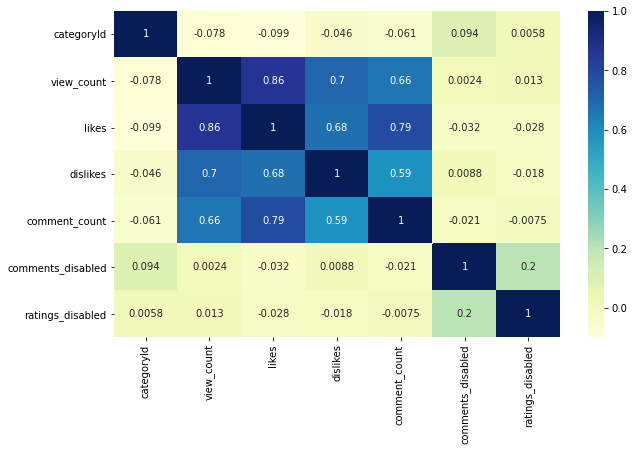

In [37]:
figure = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(trend.corr(), annot=True, cmap="YlGnBu")

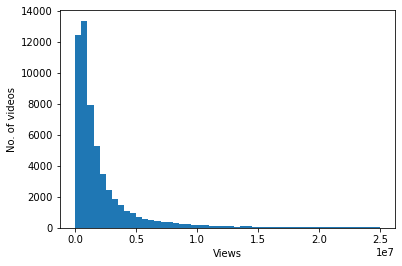

In [38]:
fig, ax = plt.subplots()
_ = sns.distplot(trend[trend["view_count"] < 25e6]["view_count"], kde=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [39]:
trend[trend['view_count'] < 1.5e6]['view_count'].count() / trend['view_count'].count() * 100

59.1391623238757

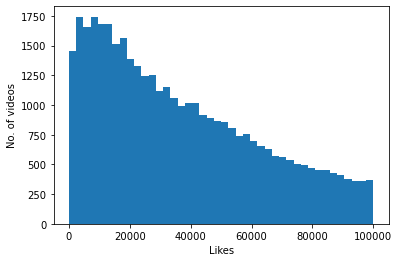

In [40]:
fig, ax = plt.subplots()
_ = sns.distplot(trend[trend["likes"] <= 1e5]["likes"], kde=False, 
                 hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [41]:
trend[trend['comment_count'] < 10000]['comment_count'].count() / trend['comment_count'].count() * 100

73.88885964450527

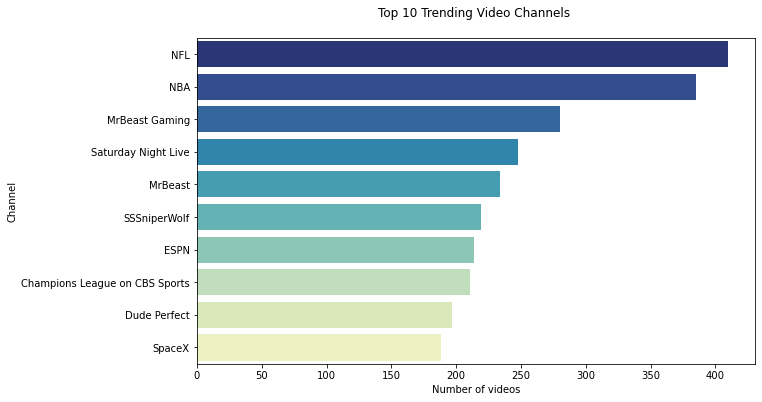

In [42]:
videos_by_channel = trend.groupby("channelTitle").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbc_plot = sns.barplot(x="no_of_videos", y="channelTitle", data=videos_by_channel, palette="YlGnBu_r")
vbc_plot = ax.set(xlabel="Number of videos", ylabel="Channel")
plt.title("Top 10 Trending Video Channels \n")
plt.show()

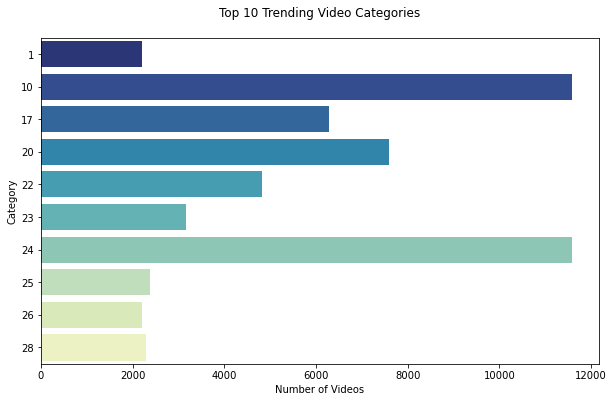

In [43]:
videos_by_category = trend.groupby("categoryId").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbcat_plot = sns.barplot(x="no_of_videos", y="categoryId", data=videos_by_category, palette="YlGnBu_r", orient = 'h')
vbcat_plot = ax.set(xlabel="Number of Videos", ylabel="Category")
plt.title("Top 10 Trending Video Categories\n")
plt.show()

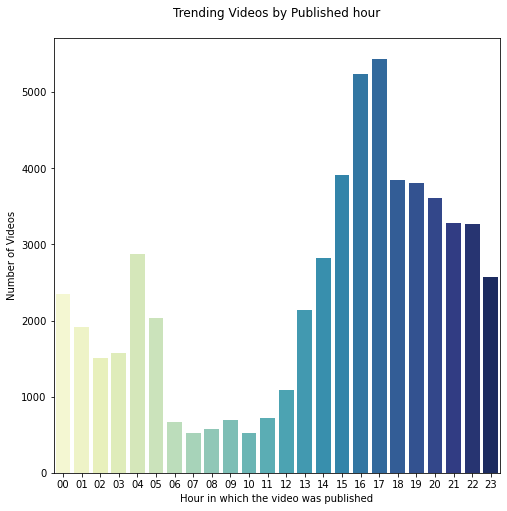

In [44]:
trend["publish_hour"] = trend["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = trend.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="YlGnBu")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

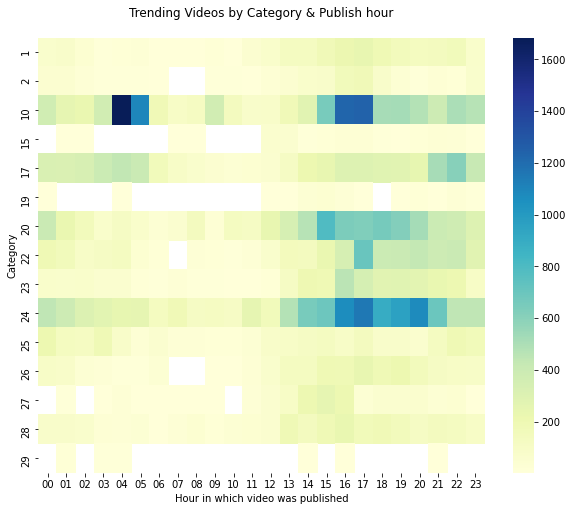

In [45]:
videos_by_cat_pub_hour=trend.groupby(["categoryId","publish_hour"]).count()["video_id"].unstack()

fig, ax = plt.subplots(figsize=(10,8))
vcph_plot = sns.heatmap(videos_by_cat_pub_hour, cmap="YlGnBu")
vcph_plot = ax.set(xlabel="Hour in which video was published", ylabel="Category")
plt.title("Trending Videos by Category & Publish hour\n")
plt.show()

Analysis about video title

In [46]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))

In [47]:
#Word count in each comment:
trend['count_word']=trend["title"].apply(lambda x: len(str(x).split()))
trend['count_word_tags']=trend["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
trend['count_unique_word']=trend["title"].apply(lambda x: len(set(str(x).split())))
trend['count_unique_word_tags']=trend["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
trend['count_letters']=trend["title"].apply(lambda x: len(str(x)))
trend['count_letters_tags']=trend["tags"].apply(lambda x: len(str(x)))

#punctuation count
trend["count_punctuations"] =trend["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
trend["count_punctuations_tags"] =trend["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
trend["count_words_upper"] = trend["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
trend["count_words_upper_tags"] = trend["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
trend["count_words_title"] = trend["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
trend["count_words_title_tags"] = trend["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
trend["count_stopwords"] = trend["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
trend["count_stopwords_tags"] = trend["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
trend["mean_word_len"] = trend["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
trend["mean_word_len_tags"] = trend["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


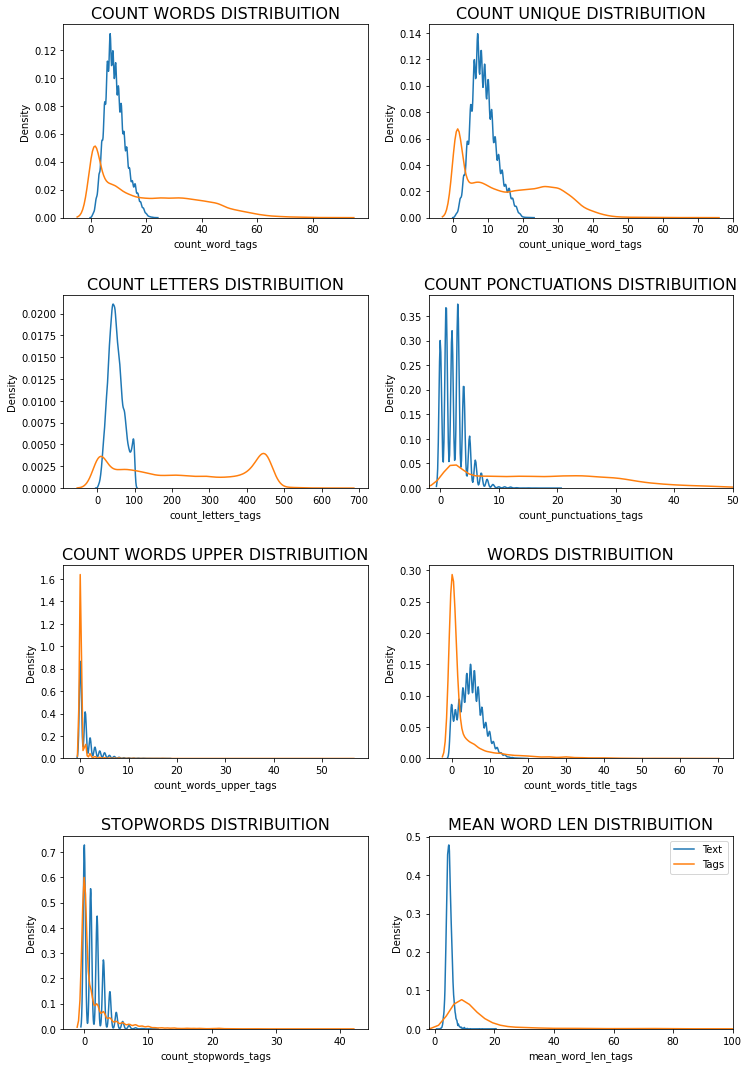

In [48]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(trend['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(trend['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(trend['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(trend['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(trend['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(trend['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(trend["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(trend["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(trend["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(trend["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(trend["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(trend["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(trend["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(trend["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(trend["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(trend["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()



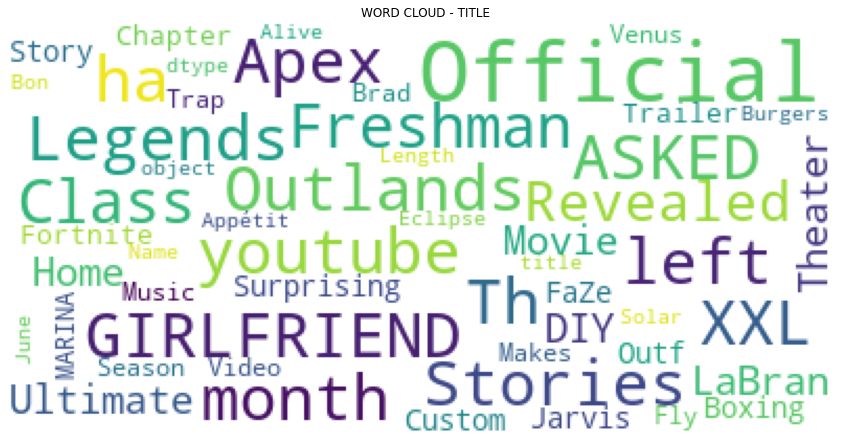

In [49]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(trend['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLE")
plt.axis('off')
plt.show()

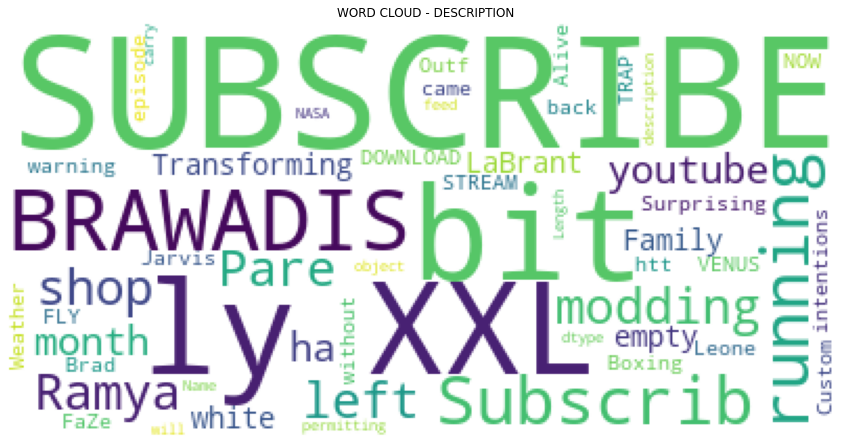

In [50]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(trend['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

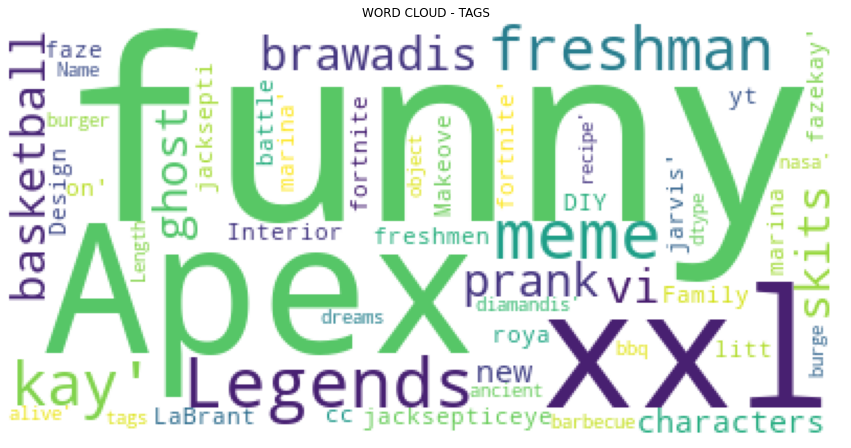

In [51]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(trend['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

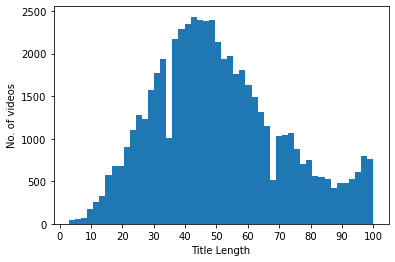

In [52]:
trend["title_length"] = trend["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(trend["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

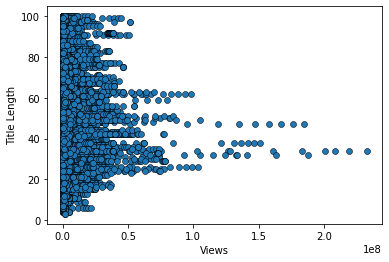

In [53]:
fig, ax = plt.subplots()
_ = ax.scatter(x=trend['view_count'], y=trend['title_length'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

We would like to see what are the most popular channel titles

In [54]:
c=trend.channelTitle.value_counts()
c=c[c>50]
c

NFL                    410
NBA                    385
MrBeast Gaming         280
Saturday Night Live    248
MrBeast                234
                      ... 
HBO Max                 51
The Verge               51
Dan Rhodes              51
MorganWallenVEVO        51
Rancho Humilde          51
Name: channelTitle, Length: 223, dtype: int64

In [55]:
titles=list(c.index)
titles

['NFL',
 'NBA',
 'MrBeast Gaming',
 'Saturday Night Live',
 'MrBeast',
 'SSSniperWolf',
 'ESPN',
 'Champions League on CBS Sports',
 'Dude Perfect',
 'SpaceX',
 'beIN SPORTS USA',
 'Fortnite',
 'The Game Theorists',
 'James Charles',
 'NBC Sports',
 'SMTOWN',
 'The Try Guys',
 'Apex Legends',
 'Marvel Entertainment',
 "Dixie D'Amelio",
 'CalebCity',
 'Simply Nailogical',
 'MrBeast Shorts',
 'The Food Theorists',
 'BLACKPINK',
 'Nintendo',
 'DAZN Boxing',
 'The Film Theorists',
 'Marques Brownlee',
 'NASA',
 'Veritasium',
 'DEATH BATTLE!',
 'Warner Bros. Pictures',
 'LazarBeam',
 'NikkieTutorials',
 'WWE',
 'Tom Scott',
 'Skip and Shannon: UNDISPUTED',
 'First We Feast',
 'SmarterEveryDay',
 'Serie A',
 'jeffreestar',
 'Matt Stonie',
 'UFC - Ultimate Fighting Championship',
 'YoungBoy Never Broke Again',
 'Gus Johnson',
 'ZHC',
 'Drew Gooden',
 'BANGTANTV',
 'Ryan Reynolds',
 'Kurzgesagt – In a Nutshell',
 'ZHC Crafts',
 'Big Hit Labels',
 'JustinBieberVEVO',
 'Tucker Budzyn',
 'Smosh P

# 4-Regression and Prediction

In the following part, we would like to make a normalization of the data and thus make a regression using the normalized data.

In [56]:
data=trend[trend['channelTitle'].isin(titles)]
data=data.reset_index()
data.drop(['index','video_id','trending_date','title','categoryId','tags','thumbnail_link','description','publishedAt'],axis=1,inplace=True)
data

,channelId,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publish_hour,count_word,...,count_punctuations_tags,count_words_upper,count_words_upper_tags,count_words_title,count_words_title_tags,count_stopwords,count_stopwords_tags,mean_word_len,mean_word_len_tags,title_length
0,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2381688,146739,2794,16549,False,False,17,10,...,24,0,0,6,30,2,0,5.100000,8.977778,60
1,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2038853,353787,2628,40221,False,False,16,11,...,29,2,0,1,0,7,3,3.909091,13.807692,53
2,UCbg_UMjlHJg_19SZckaKajg,XXL,496771,23251,1856,7647,False,False,16,8,...,23,1,0,5,7,0,0,6.125000,11.550000,56
3,UC2C_jShtL725hvbm1arSV9w,CGP Grey,1050143,89190,854,6455,False,False,17,4,...,2,2,0,1,0,1,0,3.750000,15.500000,18
4,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,741028,113983,4373,5618,False,False,23,15,...,32,0,0,11,41,0,0,3.866667,8.955556,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,UCL6JmiMXKoXS6bpP1D3bk8g,Donut Media,1472536,94781,1501,7517,False,False,16,7,...,73,0,21,7,17,1,0,4.714286,6.022727,39
19220,UCxSz6JVYmzVhtkraHWZC7HQ,Liza Koshy,809568,81980,402,2217,False,False,20,6,...,28,5,0,0,0,1,0,5.000000,10.222222,35
19221,UCuVHOs0H5hvAHGr8O4yIBNQ,Niki and Gabi,339283,19922,298,818,False,False,19,10,...,31,0,0,6,0,3,6,4.400000,6.088235,53
19222,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,5708820,211322,7123,24520,False,False,06,9,...,39,0,0,6,0,0,0,4.555556,6.410256,49


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i in ['tags','comments_disabled''ratings_disabled','video_error_or_removed','category_name','desciption','channelTitle','title',
           'contains_capitalized']:
        data[i] = le.fit_transform(data[i])
data

,channelId,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publish_hour,count_word,...,count_punctuations_tags,count_words_upper,count_words_upper_tags,count_words_title,count_words_title_tags,count_stopwords,count_stopwords_tags,mean_word_len,mean_word_len_tags,title_length
0,UC0ZV6M2THA81QT9hrVWJG3A,5,2381688,146739,2794,16549,False,False,17,10,...,24,0,0,6,30,2,0,5.100000,8.977778,60
1,UCYzPXprvl5Y-Sf0g4vX-m6g,218,2038853,353787,2628,40221,False,False,16,11,...,29,2,0,1,0,7,3,3.909091,13.807692,53
2,UCbg_UMjlHJg_19SZckaKajg,204,496771,23251,1856,7647,False,False,16,8,...,23,1,0,5,7,0,0,6.125000,11.550000,56
3,UC2C_jShtL725hvbm1arSV9w,26,1050143,89190,854,6455,False,False,17,4,...,2,2,0,1,0,1,0,3.750000,15.500000,18
4,UC648rgJOboZlgcDbW00vTSA,142,741028,113983,4373,5618,False,False,23,15,...,32,0,0,11,41,0,0,3.866667,8.955556,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,UCL6JmiMXKoXS6bpP1D3bk8g,51,1472536,94781,1501,7517,False,False,16,7,...,73,0,21,7,17,1,0,4.714286,6.022727,39
19220,UCxSz6JVYmzVhtkraHWZC7HQ,103,809568,81980,402,2217,False,False,20,6,...,28,5,0,0,0,1,0,5.000000,10.222222,35
19221,UCuVHOs0H5hvAHGr8O4yIBNQ,130,339283,19922,298,818,False,False,19,10,...,31,0,0,6,0,3,6,4.400000,6.088235,53
19222,UClG8odDC8TS6Zpqk9CGVQiQ,68,5708820,211322,7123,24520,False,False,06,9,...,39,0,0,6,0,0,0,4.555556,6.410256,49


In [58]:
from sklearn import preprocessing
X = data.drop('likes',axis=1)
X = X.drop('channelId', axis=1)
y = data.likes

x_vals = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_vals)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.022523,0.009940,0.003177,0.002729,0.0,0.0,0.739130,0.45,0.571429,0.473684,...,0.172662,0.000000,0.0,0.352941,0.566038,0.2,0.000000,0.319231,0.021536,0.583333
1,0.981982,0.008466,0.002989,0.006631,0.0,0.0,0.695652,0.50,0.324675,0.526316,...,0.208633,0.142857,0.0,0.058824,0.000000,0.7,0.111111,0.181818,0.036443,0.510417
2,0.918919,0.001836,0.002111,0.001261,0.0,0.0,0.695652,0.35,0.246753,0.368421,...,0.165468,0.071429,0.0,0.294118,0.132075,0.0,0.000000,0.437500,0.029475,0.541667
3,0.117117,0.004215,0.000971,0.001064,0.0,0.0,0.739130,0.15,0.012987,0.157895,...,0.014388,0.142857,0.0,0.058824,0.000000,0.1,0.000000,0.163462,0.041667,0.145833
4,0.639640,0.002886,0.004973,0.000926,0.0,0.0,1.000000,0.70,0.571429,0.631579,...,0.230216,0.000000,0.0,0.647059,0.773585,0.0,0.000000,0.176923,0.021468,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,0.229730,0.006031,0.001707,0.001239,0.0,0.0,0.695652,0.30,0.558442,0.315789,...,0.525180,0.000000,1.0,0.411765,0.320755,0.1,0.000000,0.274725,0.012416,0.364583
19220,0.463964,0.003181,0.000457,0.000366,0.0,0.0,0.869565,0.25,0.103896,0.263158,...,0.201439,0.357143,0.0,0.000000,0.000000,0.1,0.000000,0.307692,0.025377,0.322917
19221,0.585586,0.001159,0.000339,0.000135,0.0,0.0,0.826087,0.45,0.428571,0.473684,...,0.223022,0.000000,0.0,0.352941,0.000000,0.3,0.222222,0.238462,0.012618,0.510417
19222,0.306306,0.024246,0.008100,0.004043,0.0,0.0,0.260870,0.40,0.493506,0.421053,...,0.280576,0.000000,0.0,0.352941,0.000000,0.0,0.000000,0.256410,0.013612,0.468750


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (15379, 24)
X_test:  (3845, 24)
y_train:  (15379,)
y_test:  (3845,)


In [60]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3970,0.531532,0.077916,0.018558,0.012797,0.0,0.0,0.869565,0.60,0.000000,0.631579,...,0.014388,0.142857,0.0,0.647059,0.018868,0.5,0.000000,0.165680,0.012346,0.593750
12460,0.837838,0.005221,0.000695,0.000989,0.0,0.0,0.217391,0.30,0.000000,0.263158,...,0.057554,0.000000,0.0,0.352941,0.018868,0.2,0.000000,0.307692,0.157407,0.385417
6997,0.216216,0.021823,0.021051,0.002593,0.0,0.0,0.739130,0.30,0.389610,0.263158,...,0.345324,0.000000,0.0,0.352941,0.000000,0.2,0.148148,0.357143,0.034747,0.416667
16823,0.545045,0.001449,0.000240,0.000000,1.0,0.0,0.217391,0.45,0.000000,0.473684,...,0.014388,0.000000,0.0,0.588235,0.018868,0.0,0.000000,0.411538,0.012346,0.666667
5218,0.563063,0.011707,0.001302,0.001313,0.0,0.0,0.173913,0.40,0.207792,0.421053,...,0.237410,0.071429,0.0,0.235294,0.018868,0.0,0.000000,0.282051,0.052106,0.489583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.932432,0.036910,0.006612,0.004034,0.0,0.0,0.173913,0.25,0.000000,0.263158,...,0.014388,0.000000,0.0,0.294118,0.018868,0.2,0.000000,0.384615,0.012346,0.364583
13123,0.540541,0.021652,0.005570,0.002698,0.0,0.0,0.913043,0.10,0.000000,0.105263,...,0.014388,0.000000,0.0,0.176471,0.018868,0.0,0.000000,0.384615,0.012346,0.156250
9845,0.486486,0.010559,0.002497,0.005331,0.0,0.0,0.869565,0.10,0.025974,0.105263,...,0.007194,0.000000,0.0,0.117647,0.000000,0.1,0.037037,0.461538,0.013374,0.177083
10799,0.072072,0.001836,0.000318,0.000503,0.0,0.0,0.608696,0.40,0.077922,0.421053,...,0.079137,0.000000,0.0,0.058824,0.000000,0.2,0.000000,0.179487,0.043651,0.406250


In [61]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred=model.predict(X_test)
y

0        146739
1        353787
2         23251
3         89190
4        113983
          ...  
19219     94781
19220     81980
19221     19922
19222    211322
19223    275755
Name: likes, Length: 19224, dtype: int64

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8784737840488341

In [64]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  105316.34567998783
Mean Absolute Error on Testing Set:  104687.10821197582
R-Squared Score on Training Set:  0.8728703612923628
R-Squared Score on Testing Set:  0.8784737840488341


We get r-squared score of 0.86 which is pretty good.

In [65]:
trend["description"] = trend["description"].fillna(value="")

In [66]:
trend_1=trend.drop(columns=['title', 'publishedAt','channelId','channelTitle','trending_date','tags','thumbnail_link','description'])
catelist=['ch1','ch2','ch10','ch15','ch17','ch19','ch20','ch22','ch23','ch24','ch25','ch26','ch27','ch28','ch29']
trend_2=pd.DataFrame(columns=[catelist])
trend_new=pd.concat([trend_1,trend_2],axis=1)

In [67]:
for i in range(len(trend_new)):
    if trend_new['categoryId'][i] == 1:
        trend_new.iloc[i,8] = 1
    elif trend_new['categoryId'][i] == 2:
        trend_new.iloc[i,9] = 1
    elif trend_new['categoryId'][i] == 10:
        trend_new.iloc[i,10] = 1
    elif trend_new['categoryId'][i] == 15:
        trend_new.iloc[i,11] = 1
    elif trend_new['categoryId'][i] == 17:
        trend_new.iloc[i,12] = 1
    elif trend_new['categoryId'][i] == 19:
        trend_new.iloc[i,13] = 1
    elif trend_new['categoryId'][i] == 20:
        trend_new.iloc[i,14] = 1
    elif trend_new['categoryId'][i] == 22:
        trend_new.iloc[i,15] = 1
    elif trend_new['categoryId'][i] == 23:
        trend_new.iloc[i,16] = 1
    elif trend_new['categoryId'][i] == 24:
        trend_new.iloc[i,17] = 1
    elif trend_new['categoryId'][i] == 25:
        trend_new.iloc[i,18] = 1
    elif trend_new['categoryId'][i] == 26:
        trend_new.iloc[i,19] = 1
    elif trend_new['categoryId'][i] == 27:
        trend_new.iloc[i,20] = 1
    elif trend_new['categoryId'][i] == 28:
        trend_new.iloc[i,21] = 1
    elif trend_new['categoryId'][i] == 29:
        trend_new.iloc[i,22] = 1

In [68]:
trend_new = trend_new.fillna(0)
Y= trend_new.likes
X=trend_new.drop(columns=['likes','video_id','categoryId'])

In [69]:
reg=LinearRegression().fit(X,Y)
reg.coef_
reg.intercept_

36380.99466765954

In [70]:
Y_pred = reg.predict(X)

rmse = mean_squared_error(Y,Y_pred)**0.5
R2 = r2_score(Y,Y_pred)

In [71]:
R2

0.8364403899566977

In [72]:
rmse

173640.17338636087